## Applying Simple Numerical Integration Techniques

In [1]:
from numpy import cos, sin, pi, linspace
from pylab import figure, plot, title, legend, show
from scipy.special import jv

In [2]:
# integrand for n-th order Bessel funciton
def integrand(phi, n, x):
    return cos(n*phi - x*sin(phi))/pi

In [3]:
# Simpson's rule for numerical integration
def simpsons(a, b, N, n, x):
    h = (b-a)/N          # interval slice width
    
    s = integrand(a, n, x) + integrand(b, n, x)
    for i in range(1, N, 2):
        s += 4*integrand(a + i*h, n, x)
    for j in range(2, N-1, 2):
        s += 2*integrand(a + j*h, n, x)
    
    return h*s/3.

In [4]:
# n-th order bessel function
def bessel(n, x):
    return simpsons(0., pi, 1000, n, x)

In [5]:
# initialize array for plotting
x = linspace(0, 20, 101)

In [6]:
# Bessel functions orders 0, 3, and 5
J0 = bessel(0, x)
J3 = bessel(3, x)
J5 = bessel(5, x)

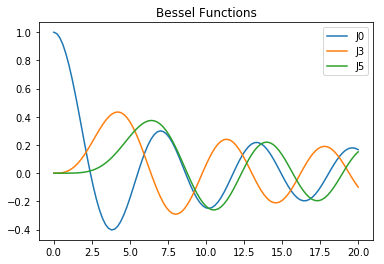

In [11]:
%matplotlib inline
title('Bessel Functions')
plot(x, J0, x, J3, x, J5)
legend(('J0', 'J3', 'J5'))

In [8]:
# scipy Bessel function values
jvJ0 = jv(0, x)
jvJ3 = jv(3, x)
jvJ5 = jv(5, x)

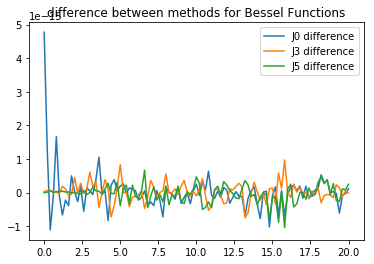

In [10]:
title('difference between methods for Bessel Functions')
plot(x, jvJ0 - J0, x, jvJ3 - J3, x, jvJ5 - J5)
legend(('J0 difference', 'J3 difference', 'J5 difference'))